<a href="https://colab.research.google.com/github/heena2248/Text_Mining/blob/main/textmining_sentimentanalysistypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Text Blob

Using Vader

Using Bag of Words Vectorization-based Models

Using LSTM-based Models

Using Transformer-based Models

TextBlob

In [1]:
!pip install textblob

In [2]:
from textblob import TextBlob

In [14]:
from textblob import TextBlob

text_1 = "The movie was so awesome."
text_2 = "Today is Thursday, but I think I its a terrible Thursday"

#Determining the Polarity
p_1 = TextBlob(text_1).sentiment.polarity
p_2 = TextBlob(text_2).sentiment.polarity

#Determining the Subjectivity
s_1 = TextBlob(text_1).sentiment.subjectivity
s_2 = TextBlob(text_2).sentiment.subjectivity

print("Polarity of Text 1 is", p_1)
print("Polarity of Text 2 is", p_2)
print("Subjectivity of Text 1 is", s_1)
print("Subjectivity of Text 2 is", s_2)

Polarity of Text 1 is 1.0
Polarity of Text 2 is -1.0
Subjectivity of Text 1 is 1.0
Subjectivity of Text 2 is 1.0


Vader

In [4]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [5]:
from  vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
text_1 = "The book was a perfect balance between wrtiting style and plot."
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)

Sentiment of text 1: {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}
Sentiment of text 2: {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}


Bag of Words Vectorization-based Models

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Loading the Dataset properly
data = pd.read_csv('finance_data.csv', encoding='latin-1')

# Check the first few rows to confirm the dataset is loaded properly
print(data.head())

# Assuming your dataset has 'sentences' and 'sentiment' columns
# Preprocessing and Bag of Words Vectorization using CountVectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
text_counts = cv.fit_transform(data['sentences'])  # Vectorize the 'sentences' column

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['sentiment'], test_size=0.25, random_state=5)

# Training the Naive Bayes model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

# Calculating the accuracy score of the model
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ", accuracy_score)

  sentiment                                          sentences
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy Score:  0.6658415841584159


Accuracy Score: 0.6658

Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.37      0.46       161
     neutral       0.76      0.79      0.77       717
    positive       0.49      0.54      0.52       334

    accuracy                           0.67      1212
   macro avg       0.62      0.57      0.58      1212
weighted avg       0.67      0.67      0.66      1212


Confusion Matrix:
[[ 60  42  59]
 [ 23 566 128]
 [ 16 137 181]]


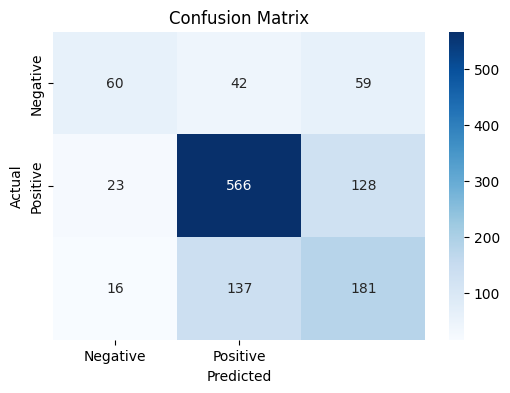

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting the sentiment for the test set
predicted = MNB.predict(X_test)

# Calculating the accuracy
accuracy_score = metrics.accuracy_score(Y_test, predicted)
print(f"Accuracy Score: {accuracy_score:.4f}")

# Classification Report: Precision, Recall, F1-Score
print("\nClassification Report:")
print(metrics.classification_report(Y_test, predicted))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(Y_test, predicted)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# New sample data
new_data = pd.DataFrame({
    'sentences': [
        "The stock market is performing well today.",
        "I'm concerned about the current economic situation.",
        "The company's earnings have exceeded expectations.",
        "There is a significant drop in the share price.",
        "The financial forecast looks promising for the next quarter."
    ]
})

# Print the new data to check
print(new_data)

                                           sentences
0         The stock market is performing well today.
1  I'm concerned about the current economic situa...
2  The company's earnings have exceeded expectati...
3    There is a significant drop in the share price.
4  The financial forecast looks promising for the...


In [22]:
# Vectorize the new data using the same CountVectorizer (cv) used for training
new_text_counts = cv.transform(new_data['sentences'])  # Use 'transform', not 'fit_transform'

# Predict the sentiment for the new data
new_predictions = MNB.predict(new_text_counts)

# Add predictions to the new data
new_data['predicted_sentiment'] = new_predictions

# Print the results
print(new_data)

                                           sentences predicted_sentiment
0         The stock market is performing well today.             neutral
1  I'm concerned about the current economic situa...             neutral
2  The company's earnings have exceeded expectati...            positive
3    There is a significant drop in the share price.             neutral
4  The financial forecast looks promising for the...            positive


LSTM

In [28]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [1]:
# Importing necessary libraries
import nltk
import pandas as pd
from textblob import Word
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Loading the dataset
data = pd.read_csv('finance_data.csv', encoding='latin-1')

# Pre-Processing the text
def cleaning(df, stop_words):
    df['sentences'] = df['sentences'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    # Replacing the digits/numbers
    df['sentences'] = df['sentences'].str.replace('\d+', '')  # Correct regex for removing digits
    # Removing stop words
    df['sentences'] = df['sentences'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
    # Lemmatization
    df['sentences'] = df['sentences'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
    return df

stop_words = stopwords.words('english')
data_cleaned = cleaning(data, stop_words)

# Generating Embeddings using tokenizer
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(data_cleaned['sentences'].values)
X = tokenizer.texts_to_sequences(data_cleaned['sentences'].values)
X = pad_sequences(X)

# Encoding target labels (assuming the target is in 'sentiment' column)
le = LabelEncoder()
y = le.fit_transform(data_cleaned['sentiment'])  # Transforming sentiment into numerical labels
y = to_categorical(y, num_classes=3)  # Assuming 3 sentiment classes

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Building
model = Sequential()
model.add(Embedding(500, 120, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(704, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(352, activation='relu'))  # LeakyReLU replaced with 'relu'
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for sentiment
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Model Training
model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1)

# Model Testing
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
114/114 ━━━━━━━━━━━━━━━━━━━━ 105s 892ms/step - accuracy: 0.5993 - loss: 0.9142
Epoch 2/2
114/114 ━━━━━━━━━━━━━━━━━━━━ 144s 914ms/step - accuracy: 0.6799 - loss: 0.7465
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.6622 - loss: 0.7646
Test Accuracy: 0.6625412702560425


Transformers

In [7]:
!pip install transformers

In [8]:
import transformers

In [9]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["It was the best of times.", "t was the worst of times."]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'POSITIVE', 'score': 0.999457061290741},
 {'label': 'NEGATIVE', 'score': 0.9987302422523499}]

In [2]:
from transformers import pipeline

sentiment_model = pipeline(model="federicopascual/finetuning-sentiment-model-3000-samples")
sentiment_model(["I love this move", "This movie sucks!"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'LABEL_1', 'score': 0.9558863043785095},
 {'label': 'LABEL_0', 'score': 0.9413502216339111}]